# BitcoinCausal.example.ipynb

This notebook demonstrates the usage of the utility API layer implemented in `BitcoinCausal_utils.py`. It includes:

- Fetching 30 days of historical Bitcoin price data
- Appending live price data
- Loading the full dataset
- Injecting a dummy market event
- Running causal inference using DoWhy
- Visualizing the time series and event impact


In [1]:
!pip install requests


In [2]:
!pip install pandas matplotlib dowhy requests


In [3]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:

from M_BitcoinCausal_utils import (
    fetch_historical_prices,
    append_live_price_to_csv,
    load_bitcoin_data,
    inject_multiple_dummy_events,
    compute_lagged_confounder,
    run_causal_analysis,
    plot_price_series,
    plot_event_impact,
    plot_multiple_events,
    compare_confounder_strategies,
    run_causal_with_estimators,
    run_full_event_analysis
)



In [4]:
# Fetches and saves hourly Bitcoin prices for the past 30 days
# Only run this once to avoid overwriting
from M_BitcoinCausal_utils import fetch_historical_prices
fetch_historical_prices(days=30)



[INFO] Fetching last 30 days of Bitcoin data...
[INFO] Saved historical data to data/raw_bitcoin.csv


In [5]:
# Appends the latest live price to the existing dataset
append_live_price_to_csv()


[INFO] Fetched live price: {'timestamp': datetime.datetime(2025, 5, 18, 2, 6, 12, 15003), 'price': 103291}
[INFO] Appended live price to data/raw_bitcoin.csv


In [6]:
# Load the combined historical and live data
df = load_bitcoin_data()
df.tail()


,timestamp,price
716,2025-05-17 23:04:50.206000,103058.426620
717,2025-05-18 00:06:32.399000,103194.656506
718,2025-05-18 01:04:54.044000,103327.244818
719,2025-05-18 02:05:59.000000,103291.226849
720,2025-05-18 02:06:12.015003,103291.000000


In [7]:
from M_BitcoinCausal_utils import inject_multiple_dummy_events



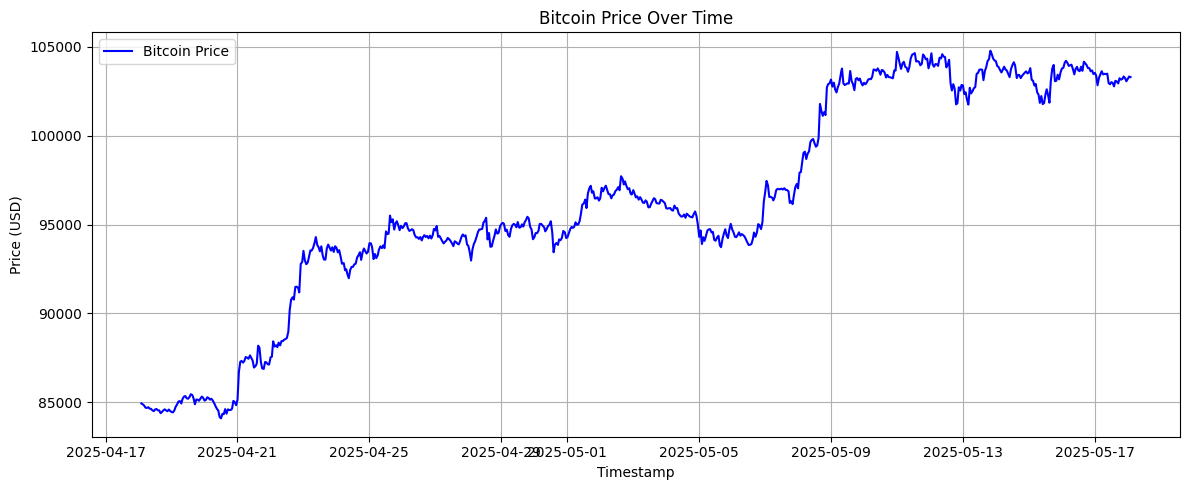

In [8]:
# Visualize price trend with event overlay
plot_price_series(df)


In [9]:
from M_BitcoinCausal_utils import inject_multiple_dummy_events

event_times = [
    df["timestamp"].iloc[-10],
    df["timestamp"].iloc[-30],
    df["timestamp"].iloc[-50]
]








[INFO] Injected 3 dummy event(s) at: [Timestamp('2025-05-17 18:04:45.129000'), Timestamp('2025-05-16 22:04:58.222000'), Timestamp('2025-05-16 02:09:46.666000')]


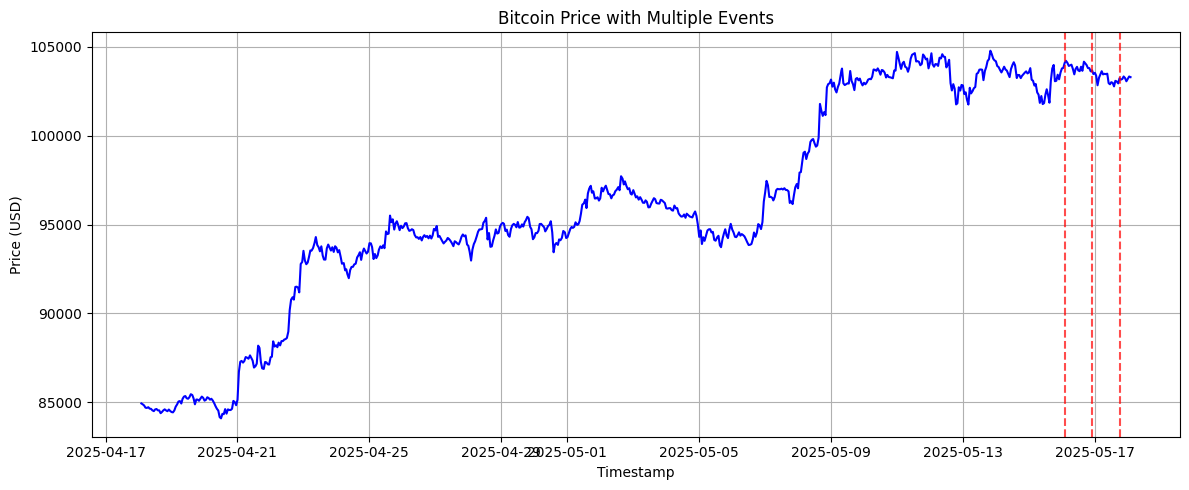

In [10]:
df = inject_multiple_dummy_events(df, event_times)
from M_BitcoinCausal_utils import plot_multiple_events
plot_multiple_events(df)


In [11]:
from M_BitcoinCausal_utils import compute_lagged_confounder

# Add lagged price as confounder
df = compute_lagged_confounder(df)




[INFO] Confounder (lagged price) added.


In [12]:
# Estimate the causal effect of the event on price
from M_BitcoinCausal_utils import run_causal_analysis
estimate, refute1, refute2 = run_causal_analysis(df)


[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 208.29464375680254

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])



[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:208.29464375680254
New effect:3.7840472969623806
p value:0.8600000000000001

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:208.29464375680254
New effect:208.78864766345797
p value:0.96



In [13]:
from M_BitcoinCausal_utils import run_causal_with_estimators

# Run multiple estimators on the current df (must contain 'event' and 'confounder')
results = run_causal_with_estimators(df)

# Display as a table
import pandas as pd
df_results = pd.DataFrame(results)
df_results



,estimator,effect
0,backdoor.linear_regression,208.294644
1,backdoor.propensity_score_matching,7102.499140


In [14]:
from M_BitcoinCausal_utils import compare_confounder_strategies

event_time = df["timestamp"].iloc[-10]
comparison_results = compare_confounder_strategies(df, event_time)

import pandas as pd
pd.DataFrame(comparison_results)


[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 284.9564719579648

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:284.9564719579648
New effect:4.273430569641496
p value:0.8600000000000001

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:284.9564719579648
New effect:236.504121312207
p value:0.88

[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 7385.846245417939

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:7385.846245417939
New effect:-48.70145418814878
p value:0.86

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:7385.846245417939
New effect:5186.602540898003
p value:0.76

[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 7014.013074637041

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:7014.013074637041
New effect:25.747746120335798
p value:0.9199999999999999

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:7014.013074637041
New effect:5674.728510778118
p value:0.78



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


,confounder,estimated_effect
0,lagged_price,284.956472
1,rolling_volatility,7385.846245
2,momentum,7014.013075


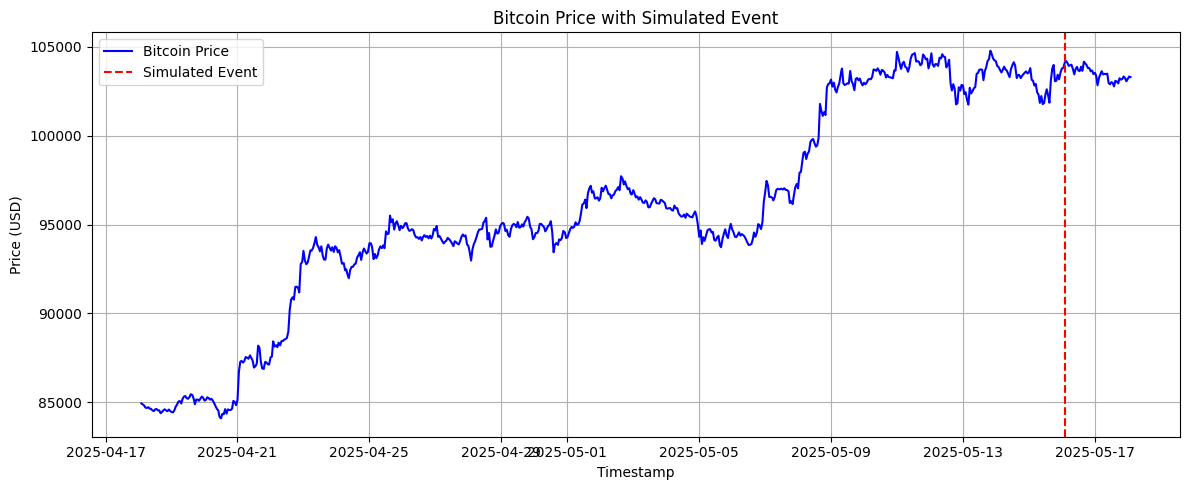

In [15]:
from M_BitcoinCausal_utils import plot_event_impact

# Plot price with event marker
plot_event_impact(df)



In [16]:
from M_BitcoinCausal_utils import run_full_event_analysis

event_times = [
    df["timestamp"].iloc[-10],
    df["timestamp"].iloc[-30],
    df["timestamp"].iloc[-50]
]

summary_df = run_full_event_analysis(df, event_times)
summary_df


[INFO] Confounder (lagged price) added.
[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 284.9564719579648

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:284.9564719579648
New effect:2.3233859731322446
p value:0.98

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:284.9564719579648
New effect:228.02889248956868
p value:0.82

[INFO] Confounder (lagged price) added.
[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 53.23915276789921

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:53.23915276789921
New effect:-3.549470181337674
p value:0.88

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:53.23915276789921
New effect:47.210492967602185
p value:0.94

[INFO] Confounder (lagged price) added.
[INFO] Defining CausalModel (no graph)...
[INFO] Identifying estimand...
[INFO] Estimating effect using linear regression...

[RESULT] Estimated Treatment Effect: 282.3446176596044

[INFO] Running placebo refutation test...
[INFO] Running data subset refutation test...


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.


[INFO] Refutation Test 1 Result (Placebo): Refute: Use a Placebo Treatment
Estimated effect:282.3446176596044
New effect:-1.3395283315535926
p value:0.94

[INFO] Refutation Test 2 Result (Subset): Refute: Use a subset of data
Estimated effect:282.3446176596044
New effect:228.1686493104964
p value:0.78



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


,Event #,Event Time,Estimated Effect,Placebo P-Value,Subset P-Value
0,1,2025-05-17 18:04:45.129,284.956472,0.98,0.82
1,2,2025-05-16 22:04:58.222,53.239153,0.88,0.94
2,3,2025-05-16 02:09:46.666,282.344618,0.94,0.78
